In [6]:
import numpy as np
from matplotlib import image
from matplotlib import pyplot

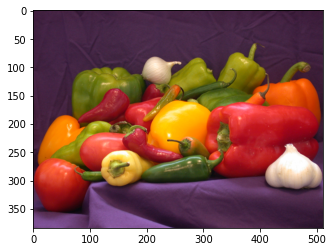

In [7]:
img = image.imread('imagens/peppers.bmp')
pyplot.imshow(img)
pyplot.show()